In [1]:
#Alternative Lab 2.09. Logistic regression

In [2]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

import getpass  # to get the password without showing the input
password = getpass.getpass()

connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)

········


In [3]:
query='''select a.inventory_id, a.film_id, count(l.rental_id) as 'TimesRented', l.rental_date, f.title, f.rating from inventory a
left join rental l on a.inventory_id = l.inventory_id
left join film f on a.film_id = f.film_id
group by f.title;'''

data=pd.read_sql_query(query,engine)
data

,inventory_id,film_id,TimesRented,rental_date,title,rating
0,1,1,24,2005-07-08 19:03:15,ACADEMY DINOSAUR,PG
1,9,2,7,2005-08-01 04:24:47,ACE GOLDFINGER,G
2,12,3,12,2005-07-27 01:21:19,ADAPTATION HOLES,NC-17
3,16,4,23,2005-07-12 02:40:41,AFFAIR PREJUDICE,G
4,23,5,12,2005-05-28 07:53:38,AFRICAN EGG,G
...,...,...,...,...,...,...
953,4563,996,7,2005-07-08 23:51:26,YOUNG LANGUAGE,G
954,4565,997,6,2005-07-27 10:21:15,YOUTH KICK,NC-17
955,4567,998,9,2005-06-17 03:19:20,ZHIVAGO CORE,NC-17
956,4569,999,17,2005-07-06 11:40:27,ZOOLANDER FICTION,R


In [4]:
data.shape, data.dtypes

((958, 6),
 inventory_id             int64
 film_id                  int64
 TimesRented              int64
 rental_date     datetime64[ns]
 title                   object
 rating                  object
 dtype: object)

In [5]:
data.isna().sum()

inventory_id    0
film_id         0
TimesRented     0
rental_date     0
title           0
rating          0
dtype: int64

In [6]:
data.describe()

,inventory_id,film_id,TimesRented
count,958.000000,958.000000,958.000000
mean,2296.699374,502.598121,16.748434
std,1317.853616,287.541738,6.677241
min,1.000000,1.000000,4.000000
25%,1159.750000,256.250000,11.000000
50%,2322.000000,504.500000,16.000000
75%,3427.500000,751.750000,22.000000
max,4574.000000,1000.000000,34.000000


In [7]:
for col in data.select_dtypes('object'):
    print(data[col].value_counts(), '\n')

REMEMBER DIARY       1
HOME PITY            1
MALTESE HOPE         1
MAGUIRE APACHE       1
VOLCANO TEXAS        1
                    ..
MOB DUFFEL           1
LIFE TWISTED         1
CHICAGO NORTH        1
CRUSADE HONEY        1
PERSONAL LADYBUGS    1
Name: title, Length: 958, dtype: int64 

PG-13    213
NC-17    202
R        189
PG       183
G        171
Name: rating, dtype: int64 



In [8]:
#movies=data[col].value_counts()

In [9]:
#movies=pd.DataFrame(movies).reset_index()

In [10]:
#movies.columns=['Title','Times']
#movies

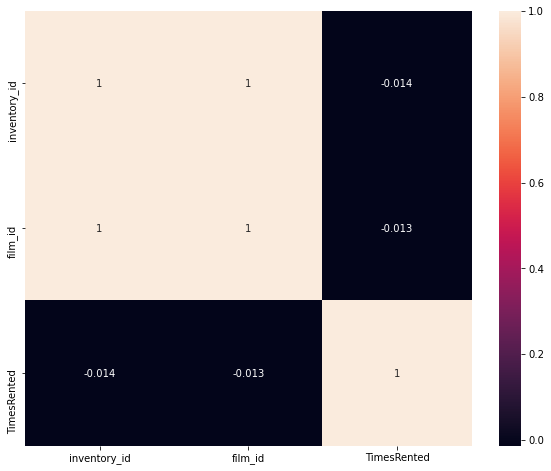

In [11]:
corr_matrix=data.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [15]:
data1 = data.copy()
data1=data1.drop('rental_date', axis=1)
data1 = pd.get_dummies(data1, columns=['title'])

In [16]:
y = data1['rating']
X = data1.drop('rating', axis=1)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
classification = LogisticRegression(random_state=42)

classification.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [19]:
classification.score(X_test, y_test)

0.21354166666666666

In [20]:
y_test

836        G
477        R
350        G
891        R
855       PG
       ...  
462        R
673    NC-17
33        PG
31     NC-17
714    PG-13
Name: rating, Length: 192, dtype: object

In [21]:
predictions = classification.predict(X_test)
predictions

array(['PG-13', 'PG-13', 'PG-13', 'PG-13', 'PG-13', 'PG', 'PG', 'NC-17',
       'NC-17', 'PG-13', 'PG-13', 'NC-17', 'PG', 'PG-13', 'PG-13',
       'PG-13', 'R', 'R', 'PG-13', 'PG-13', 'PG-13', 'NC-17', 'PG-13',
       'NC-17', 'PG-13', 'NC-17', 'PG', 'PG-13', 'PG-13', 'NC-17',
       'PG-13', 'NC-17', 'PG-13', 'NC-17', 'PG-13', 'PG-13', 'PG-13',
       'NC-17', 'PG-13', 'PG-13', 'PG-13', 'NC-17', 'PG-13', 'PG',
       'NC-17', 'PG-13', 'NC-17', 'NC-17', 'PG-13', 'PG', 'PG-13',
       'PG-13', 'PG', 'PG-13', 'R', 'PG', 'NC-17', 'PG-13', 'PG-13',
       'NC-17', 'PG', 'NC-17', 'PG-13', 'NC-17', 'PG', 'R', 'NC-17',
       'PG-13', 'PG-13', 'PG-13', 'PG-13', 'PG', 'PG-13', 'PG-13', 'PG',
       'R', 'NC-17', 'PG-13', 'PG', 'PG-13', 'NC-17', 'PG-13', 'PG-13',
       'NC-17', 'PG-13', 'PG-13', 'PG-13', 'PG-13', 'NC-17', 'PG-13', 'R',
       'PG-13', 'PG-13', 'PG-13', 'NC-17', 'PG-13', 'PG-13', 'NC-17',
       'PG-13', 'NC-17', 'PG-13', 'PG', 'PG-13', 'PG', 'PG-13', 'PG-13',
       'PG', 'PG-

In [22]:
probabilities = classification.predict_proba(X_test)
probabilities

array([[0.13180109, 0.21268714, 0.16114167, 0.25737286, 0.23699724],
       [0.15058914, 0.20067205, 0.17260217, 0.23896637, 0.23717027],
       [0.16749111, 0.20178544, 0.18764442, 0.22567509, 0.21740394],
       [0.12235319, 0.1989137 , 0.16375232, 0.26775418, 0.2472266 ],
       [0.12877583, 0.21232869, 0.15712805, 0.25974189, 0.24202554],
       [0.18993257, 0.19384552, 0.23059272, 0.20823939, 0.17738981],
       [0.20447351, 0.20234599, 0.23466301, 0.19666847, 0.16184902],
       [0.17880839, 0.21999517, 0.18014017, 0.21573951, 0.20531676],
       [0.20094617, 0.21541308, 0.1888077 , 0.19912047, 0.19571258],
       [0.12179176, 0.20339474, 0.1547268 , 0.26638612, 0.25370058],
       [0.16518802, 0.20394279, 0.21131893, 0.22955296, 0.1899973 ],
       [0.21572607, 0.23983094, 0.17522669, 0.18689586, 0.18232044],
       [0.20481601, 0.21400746, 0.21631314, 0.19683476, 0.16802862],
       [0.11889118, 0.17302648, 0.20412963, 0.27583236, 0.22812034],
       [0.17148157, 0.21549806, 0.

In [23]:
confusion_matrix(y_test, predictions)

array([[ 0, 11,  4, 20,  2],
       [ 1,  7,  7, 21,  2],
       [ 0, 11,  5, 24,  2],
       [ 0,  6,  7, 25,  4],
       [ 0,  7,  4, 18,  4]], dtype=int64)

<AxesSubplot:>

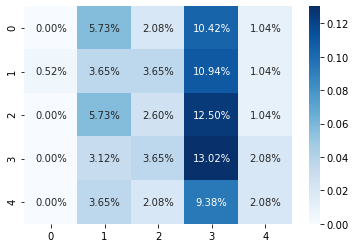

In [24]:
cf_matrix = confusion_matrix(y_test, predictions, normalize='all')
sns.heatmap(cf_matrix, annot=True, fmt='.2%', cmap='Blues')